# **Install Library**

# **Import Library**

In [ ]:
!pip install geopandas
!pip install simple_colors
!pip install tensorflow  # Untuk LSTM
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# **Read Dataset**

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from simple_colors import *
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Memuat dataset
# Load dataset gempa
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_1.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_2.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_3.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_4.csv"
dataset5 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_5.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)
df5 = pd.read_csv(dataset5)

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

data_gempa = merged_df

# Mengubah kolom "time" menjadi tipe data datetime
data_gempa['time'] = pd.to_datetime(data_gempa['time'])

# Memisahkan kolom "time" menjadi dua kolom terpisah: "date" dan "time"
data_gempa['date'] = data_gempa['time'].dt.date
data_gempa['time'] = data_gempa['time'].dt.time

# Mengonversi kolom "time" menjadi string dengan format HH:MM:SS
data_gempa['time'] = data_gempa['time'].apply(lambda x: x.strftime('%H:%M:%S'))

selected_columns = ['time','date', 'latitude', 'longitude', 'place' ,'depth', 'mag', 'magType', 'type']
data_gempa = data_gempa.loc[:, selected_columns]

# Menampilkan lima baris pertama setelah pemisahan
data_gempa.head(5)

,time,date,latitude,longitude,depth,mag,class_mag,class_depth,Faults Density
0,11:05:59,1994-12-31,2.475,126.188,86.8,5.2,3,2,0.063425
1,21:28:48,1994-12-30,-5.092,103.514,99.0,5.1,3,2,0.297182
2,03:46:35,1994-12-30,-9.697,124.116,78.5,4.8,2,2,0.146666
3,06:15:10,1994-12-29,-8.608,119.387,142.2,4.2,2,2,0.177693
4,04:33:53,1994-12-29,-5.112,102.689,60.7,5.4,3,2,0.259927


In [ ]:
# Pastikan kolom 'date' dalam format datetime
data_gempa_filtered['date'] = pd.to_datetime(data_gempa_filtered['date'])

# Filter data hanya tahun 1993 - 2023
data_gempa_filtered = data_gempa_filtered[
    (data_gempa_filtered['date'] >= '1993-01-01') &
    (data_gempa_filtered['date'] <= '2023-12-31')
]

print("Jumlah data setelah filter:", len(data_gempa_filtered))
data_gempa_filtered.head()


Jumlah data setelah filter: 56165


,time,date,latitude,longitude,depth,mag,class_mag,class_depth,Faults Density
0,11:05:59,1994-12-31,2.475,126.188,86.8,5.2,3,2,0.063425
1,21:28:48,1994-12-30,-5.092,103.514,99.0,5.1,3,2,0.297182
2,03:46:35,1994-12-30,-9.697,124.116,78.5,4.8,2,2,0.146666
3,06:15:10,1994-12-29,-8.608,119.387,142.2,4.2,2,2,0.177693
4,04:33:53,1994-12-29,-5.112,102.689,60.7,5.4,3,2,0.259927


In [ ]:
# Function to combine 'date' and 'time' into a single 'datetime' column
def combine_date_time(row):
    return f"{row['date']} {row['time']}"

# Apply the function to create a new 'datetime' column
data_gempa_filtered['datetime'] = data_gempa_filtered.apply(combine_date_time, axis=1)

# Display the first five rows of the dataset with the new 'datetime' column
data_gempa_filtered.head(5)

data_gempa_filteredd = data_gempa_filtered

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (replace with your DataFrame)
data = data_gempa_filtered  # Adjust this to your DataFrame

# Convert 'datetime' column to numeric format if needed
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['datetime'] = data['datetime'].astype(np.int64) // 10**9  # Convert to seconds since epoch

/tmp/ipython-input-2779239956.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')


In [ ]:
data_gempa_filtered = data
data_gempa_filtered.head()

,time,date,latitude,longitude,depth,mag,class_mag,class_depth,Faults Density,datetime
0,11:05:59,1994-12-31,2.475,126.188,86.8,5.2,3,2,0.063425,788871959
1,21:28:48,1994-12-30,-5.092,103.514,99.0,5.1,3,2,0.297182,788822928
2,03:46:35,1994-12-30,-9.697,124.116,78.5,4.8,2,2,0.146666,788759195
3,06:15:10,1994-12-29,-8.608,119.387,142.2,4.2,2,2,0.177693,788681710
4,04:33:53,1994-12-29,-5.112,102.689,60.7,5.4,3,2,0.259927,788675633


In [ ]:
data_gempa = data_gempa_filtered

In [ ]:
data_gempa = data

# Pastikan 'date' sudah dalam format string (YYYY-MM-DD)
data_gempa['date'] = pd.to_datetime(data_gempa['date']).dt.strftime('%Y-%m-%d')

# Gabungkan 'date' dan 'time' lalu jadikan timestamp
data_gempa['timestamp'] = pd.to_datetime(data_gempa['date'] + ' ' + data_gempa['time'])

# Drop kolom yang sudah redundant kalau tidak dipakai lagi
# data_gempa.drop(columns=['date', 'time'], inplace=True)

# Cek hasil


# **Feature Engineering**

In [ ]:
import pandas as pd

# Mengasumsikan df sudah didefinisikan
df = data_gempa

# Fungsi untuk menambah fitur berdasarkan waktu
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['hour'] = df.timestamp.dt.hour
    df['dayofweek'] = df.timestamp.dt.dayofweek
    df['month'] = df.timestamp.dt.month
    df['year'] = df.timestamp.dt.year
    df['dayofyear'] = df.timestamp.dt.dayofyear
    df['dayofmonth'] = df.timestamp.dt.day
    df['weekofyear'] = df.timestamp.dt.isocalendar().week
    df['quarter'] = df.timestamp.dt.quarter
    df['season'] = df.month % 12 // 3 + 1
    return df

# Fungsi untuk menambah lag
def add_lags(df: pd.DataFrame) -> pd.DataFrame:
    df['mag_5eq_lag'] = df.mag.shift(3)
    df['mag_10eq_lag'] = df.mag.shift(6)
    df['mag_15eq_lag'] = df.mag.shift(9)

    df['depth_5eq_lag'] = df.depth.shift(3)
    df['depth_10eq_lag'] = df.depth.shift(6)
    df['depth_15eq_lag'] = df.depth.shift(9)

    # Menambahkan fitur selisih waktu antar kejadian gempa (dalam hari)
    df['time_diff'] = df.timestamp.diff().dt.days
    return df

# Fungsi untuk menambah rolling windows
def add_rolling_windows(df: pd.DataFrame) -> pd.DataFrame:
    df['mag_5eq_avg'] = df.mag.rolling(window=5, min_periods=1).mean()
    df['mag_10eq_avg'] = df.mag.rolling(window=10, min_periods=1).mean()
    df['mag_15eq_avg'] = df.mag.rolling(window=15, min_periods=1).mean()
    df['mag_5eq_min'] = df.mag.rolling(window=5, min_periods=1).min()
    df['mag_10eq_min'] = df.mag.rolling(window=10, min_periods=1).min()
    df['mag_15eq_min'] = df.mag.rolling(window=15, min_periods=1).min()
    df['mag_5eq_max'] = df.mag.rolling(window=5, min_periods=1).max()
    df['mag_10eq_max'] = df.mag.rolling(window=10, min_periods=1).max()
    df['mag_15eq_max'] = df.mag.rolling(window=15, min_periods=1).max()
    df['mag_5eq_std'] = df.mag.rolling(window=5, min_periods=1).std()
    df['mag_10eq_std'] = df.mag.rolling(window=10, min_periods=1).std()
    df['mag_15eq_std'] = df.mag.rolling(window=15, min_periods=1).std()

    df['depth_5eq_avg'] = df.depth.rolling(window=5, min_periods=1).mean()
    df['depth_10eq_avg'] = df.depth.rolling(window=10, min_periods=1).mean()
    df['depth_15eq_avg'] = df.depth.rolling(window=15, min_periods=1).mean()
    df['depth_5eq_min'] = df.depth.rolling(window=5, min_periods=1).min()
    df['depth_10eq_min'] = df.depth.rolling(window=10, min_periods=1).min()
    df['depth_15eq_min'] = df.depth.rolling(window=15, min_periods=1).min()
    df['depth_5eq_max'] = df.depth.rolling(window=5, min_periods=1).max()
    df['depth_10eq_max'] = df.depth.rolling(window=10, min_periods=1).max()
    df['depth_15eq_max'] = df.depth.rolling(window=15, min_periods=1).max()
    df['depth_5eq_std'] = df.depth.rolling(window=5, min_periods=1).std()
    df['depth_10eq_std'] = df.depth.rolling(window=10, min_periods=1).std()
    df['depth_15eq_std'] = df.depth.rolling(window=15, min_periods=1).std()

    df['mag_7day_avg_change'] = df['mag'].diff(7)
    df['mag_14day_avg_change'] = df['mag'].diff(14)
    df['mag_21day_avg_change'] = df['mag'].diff(21)

    df['depth_7day_avg_change'] = df['depth'].diff(7)
    df['depth_14day_avg_change'] = df['depth'].diff(14)
    df['depth_21day_avg_change'] = df['depth'].diff(21)

    # Menangani NaN setelah operasi diff, shift, dan rolling
    df.fillna(method='ffill', inplace=True)  # Mengisi NaN dengan nilai sebelumnya
    df.fillna(method='bfill', inplace=True)  # Mengisi NaN dengan nilai berikutnya jika ada yang masih kosong
    return df

# Menerapkan fungsi-fungsi tersebut
df = create_features(df)
df = add_lags(df)
df = add_rolling_windows(df)

# Menampilkan hasil DataFrame yang sudah diperbarui
df.head(20)

/tmp/ipython-input-3357321556.py:71: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Mengisi NaN dengan nilai sebelumnya
/tmp/ipython-input-3357321556.py:72: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Mengisi NaN dengan nilai berikutnya jika ada yang masih kosong


,time,date,latitude,longitude,depth,mag,class_mag,class_depth,Faults Density,datetime,...,depth_15eq_max,depth_5eq_std,depth_10eq_std,depth_15eq_std,mag_7day_avg_change,mag_14day_avg_change,mag_21day_avg_change,depth_7day_avg_change,depth_14day_avg_change,depth_21day_avg_change
0,11:05:59,1994-12-31,2.475,126.188,86.8,5.2,3,2,0.063425,788871959,...,86.8,8.626703,8.626703,8.626703,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
1,21:28:48,1994-12-30,-5.092,103.514,99.0,5.1,3,2,0.297182,788822928,...,99.0,8.626703,8.626703,8.626703,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
2,03:46:35,1994-12-30,-9.697,124.116,78.5,4.8,2,2,0.146666,788759195,...,99.0,10.311644,10.311644,10.311644,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
3,06:15:10,1994-12-29,-8.608,119.387,142.2,4.2,2,2,0.177693,788681710,...,142.2,28.330005,28.330005,28.330005,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
4,04:33:53,1994-12-29,-5.112,102.689,60.7,5.4,3,2,0.259927,788675633,...,142.2,30.609035,30.609035,30.609035,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
5,22:39:23,1994-12-28,5.211,126.316,72.5,5.0,3,2,0.006405,788654363,...,142.2,32.020103,28.681196,28.681196,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
6,15:01:47,1994-12-28,-10.585,121.723,70.9,5.1,3,2,0.173362,788626907,...,142.2,32.632928,27.154233,27.154233,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
7,03:15:16,1994-12-28,3.745,128.215,33.0,4.9,2,1,0.014386,788584516,...,142.2,40.322736,31.616587,31.616587,-0.3,-0.5,-0.7,-53.8,26.1,-53.8
8,21:59:50,1994-12-27,4.295,125.924,182.0,4.9,2,2,0.018732,788565590,...,182.0,57.121773,44.949750,44.949750,-0.2,-0.5,-0.7,83.0,26.1,-53.8
9,16:43:03,1994-12-27,0.772,127.232,176.0,4.5,2,2,0.129443,788546583,...,182.0,67.741029,50.060657,50.060657,-0.3,-0.5,-0.7,97.5,26.1,-53.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56165 entries, 0 to 56164
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    56165 non-null  object        
 1   date                    56165 non-null  object        
 2   latitude                56165 non-null  float64       
 3   longitude               56165 non-null  float64       
 4   depth                   56165 non-null  float64       
 5   mag                     56165 non-null  float64       
 6   class_mag               56165 non-null  int64         
 7   class_depth             56165 non-null  int64         
 8   Faults Density          56165 non-null  float64       
 9   datetime                56165 non-null  int64         
 10  timestamp               56165 non-null  datetime64[ns]
 11  hour                    56165 non-null  int32         
 12  dayofweek               56165 non-null  int32 

In [ ]:
data_gempa_filtered = df
data_gempa_filtered.describe()

,latitude,longitude,depth,mag,class_mag,class_depth,Faults Density,datetime,timestamp,hour,...,depth_15eq_max,depth_5eq_std,depth_10eq_std,depth_15eq_std,mag_7day_avg_change,mag_14day_avg_change,mag_21day_avg_change,depth_7day_avg_change,depth_14day_avg_change,depth_21day_avg_change
count,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,5.616500e+04,56165,56165.000000,...,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000,56165.000000
mean,-2.429582,121.026385,81.707617,4.504460,2.083344,1.408475,0.236151,1.258126e+09,2009-11-13 15:29:00.190901760,11.816184,...,322.662381,74.511990,83.696258,87.885764,-0.000105,-0.000249,-0.000442,-0.001815,0.009026,-0.008419
min,-11.000000,-120.844833,0.000000,2.700000,0.000000,1.000000,0.000000,7.258556e+08,1993-01-01 02:33:07,0.000000,...,10.000000,0.000000,0.000000,0.000000,-4.300000,-5.300000,-5.000000,-642.500000,-642.100000,-645.100000
25%,-6.716200,113.189300,30.000000,4.200000,2.000000,1.000000,0.123087,1.069606e+09,2003-11-23 16:38:52,6.000000,...,173.000000,26.049607,42.297030,48.841951,-0.300000,-0.300000,-0.300000,-37.740000,-38.500000,-38.700000
50%,-2.539000,126.197000,35.000000,4.400000,2.000000,1.000000,0.187626,1.234437e+09,2009-02-12 11:10:00,12.000000,...,291.550000,54.731856,67.878359,79.225983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.514500,128.756000,100.000000,4.700000,2.000000,2.000000,0.334035,1.493044e+09,2017-04-24 14:33:00,18.000000,...,503.150000,97.706830,125.122715,131.125066,0.300000,0.300000,0.300000,37.870000,38.200000,38.500000
max,35.544667,140.999000,675.500000,9.100000,5.000000,3.000000,1.000000,1.704036e+09,2023-12-31 15:23:14,23.000000,...,675.500000,329.334939,297.520636,288.040419,3.900000,4.290000,4.700000,642.500000,642.940000,642.500000
std,4.557992,12.414746,104.256553,0.444961,0.451060,0.578974,0.179923,2.677554e+08,NaN,6.929470,...,177.717397,67.740328,56.751235,50.494960,0.608862,0.608351,0.609913,143.922094,144.152820,144.999118


# **CNN Model Prediction**

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1405/1405 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.9520 - val_loss: 0.0253
Epoch 2/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0344 - val_loss: 0.0254
Epoch 3/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0319 - val_loss: 0.0205
Epoch 4/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0281 - val_loss: 0.0210
Epoch 5/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0276 - val_loss: 0.0206
Epoch 6/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0271 - val_loss: 0.0198
Epoch 7/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0259 - val_loss: 0.0232
Epoch 8/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0249 - val_loss: 0.0224
Epoch 9/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0257 - val_loss: 0.0190
Epoch 10/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0246 - val_loss: 0.0242
Epoch 11/20
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0245 - val_loss: 0.0300
Epoch 12/20
1405/1405 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


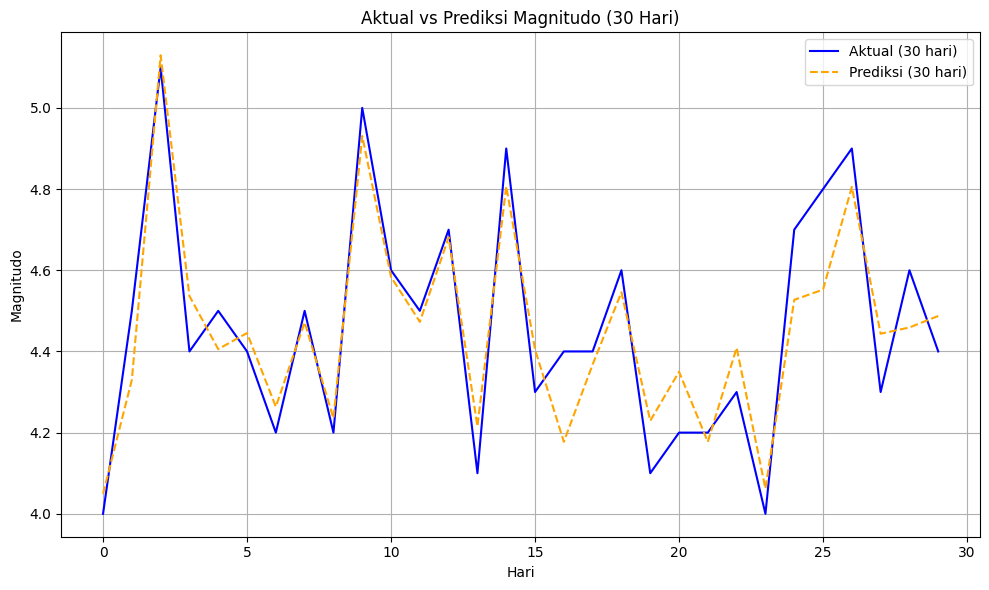

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, f1_score, recall_score, precision_score
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# --- [1] Bagi data 80% train, 10% val, 10% test ---
features = [
    'dayofyear', 'hour', 'dayofweek', 'month', 'season', 'year', 'depth', 'datetime',
    'class_mag', 'class_depth', 'Faults Density', 'mag_5eq_lag', 'mag_10eq_lag',
    'mag_15eq_lag', 'mag_5eq_avg', 'mag_10eq_avg', 'mag_15eq_avg', 'mag_5eq_min',
    'mag_10eq_min', 'mag_15eq_min', 'mag_5eq_max', 'mag_10eq_max', 'mag_15eq_max',
    'mag_5eq_std', 'mag_10eq_std', 'mag_15eq_std', 'depth_5eq_lag', 'depth_10eq_lag',
    'depth_15eq_lag', 'depth_5eq_avg', 'depth_10eq_avg', 'depth_15eq_avg', 'depth_5eq_min',
    'depth_10eq_min', 'depth_15eq_min', 'depth_5eq_max', 'depth_10eq_max', 'depth_15eq_max',
    'depth_5eq_std', 'depth_10eq_std', 'depth_15eq_std', 'latitude', 'longitude',
    'mag_7day_avg_change', 'mag_14day_avg_change', 'mag_21day_avg_change',
    'depth_7day_avg_change', 'depth_14day_avg_change', 'depth_21day_avg_change'
]
target = 'mag'

X = df[features].values
y = df[target].values

# Split 80% train + 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
# Split temp menjadi 10% val dan 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# --- [2] Normalisasi data ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- [3] Model ANN ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- [4] Training model ---
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# --- [5] Prediksi ---
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# --- [6] Fungsi Evaluasi Lengkap ---
def evaluate_all(y_true, y_pred, label, threshold=5):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    y_true_class = (y_true >= threshold).astype(int)
    y_pred_class = (y_pred >= threshold).astype(int)
    acc = accuracy_score(y_true_class, y_pred_class)
    f1 = f1_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)  # Sensitivity
    precision = precision_score(y_true_class, y_pred_class)

    print(f"\n--- {label} ---")
    print(f"RMSE       : {rmse:.4f}")
    print(f"MAE        : {mae:.4f}")
    print(f"R²         : {r2:.4f}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"F1-score   : {f1:.4f}")
    print(f"Sensitivity: {recall:.4f}")
    print(f"Precision  : {precision:.4f}")

# --- [7] Evaluasi Semua Fase ---
def evaluate_phase(y_true, y_pred, phase):
    evaluate_all(y_true, y_pred, f"{phase} (Keseluruhan)")
    # 15 hari
    evaluate_all(y_true[:15], y_pred[:15], f"{phase} (15 Hari)")
    # 30 hari
    evaluate_all(y_true[:30], y_pred[:30], f"{phase} (30 Hari)")

# Jalankan untuk Train / Val / Test
evaluate_phase(y_train, y_train_pred, "Training")
evaluate_phase(y_val, y_val_pred, "Validation")
evaluate_phase(y_test, y_test_pred, "Testing")

# --- [8] Visualisasi Hasil Prediksi (30 Hari) ---
plt.figure(figsize=(10,6))
plt.plot(y_test[:30], label='Aktual (30 hari)', color='blue')
plt.plot(y_test_pred[:30], label='Prediksi (30 hari)', color='orange', linestyle='--')
plt.title('Aktual vs Prediksi Magnitudo (30 Hari)')
plt.xlabel('Hari')
plt.ylabel('Magnitudo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
